In [ ]:
# 2-armed Bandit problem:

# Think of an agent that plays a 2-armed bandit, trying to maximize its total reward. In each step, the 
# agent selects one of the levers and is given some reward according to the reward distribution of that 
# lever. Assume that reward distribution for the first lever is a Gaussian with 𝜇𝜇1 = 5, 𝜎𝜎12 = 10, and for 
# the second lever is a binomial Gaussian with 𝜇𝜇21 = 10, 𝜎𝜎212 = 15, 𝜇𝜇22 = 4, 𝜎𝜎222 = 10, which means 
# that  the  resulting  output  will  be  uniformly  probable  from  these  two  Gaussian  distributions. 
# In  this  problem,  we  assume  the  reward  distributions  are  unknown,  and  the  agent  only  
# sees  a  realization  of  reward  after  selecting  an  action.  The  agent  takes  action  according  to  the  𝜖𝜖-
# greedy action selection policy with parameter 𝜖. We  consider  the  agent  selects  1000  actions,  which  is  referred  to  as  step/time.  In  order  to  have  
# smooth results, we repeat 1000 steps for 100 independent runs. 

# Part a - In this part, set the initial Q values at the beginning of each run as 𝑄(𝑎1) = 𝑄(𝑎2) = 0. Assuming 
# action 𝑎 is  selected  at  time  step  𝑘 and  the  reward  𝑟_𝑘  is  observed,  the  Q-value  for  the  
# corresponding  action  will  be  updated  according  to:  𝑄(𝑎) = 𝑄(𝑎) + 𝛼( r − 𝑄(𝑎) ).  For  the  
# learning rates, consider the following values: 𝛼 = 1, 𝛼 = 0.9𝑘𝑘 , 𝛼 =1/1+Ln(1+𝑘) and 𝛼 = 1/𝑘 and for 
# the  𝜖-greedy  policy,  use  𝜖 = 0, 0.1, 0.2, 0.5.  
# For the 𝑖𝑖th independent run, you need to keep track of accumulated rewards as: 
# Acc R^i_k=(1/k) sum_{j=1 to k} r_j
# where Acc R^i_k denotes the average reward per step obtained by the agent up to the time step 𝑘 in  the  ith  independent  run.  Then  the  average  over  100  independent  runs  of  accumulated 
# rewards Acc R^i_k can be obtained at any given step/time 𝑘 = 1, ... ,1000 as: 
# Acc R_k=(1/100) sum_{j=1 to 100} Acc R^i_k

# Part b - For  a  fixed  𝛼 = 0.1  and  𝜖= 0.1,  use  the  following  optimistic  initial  values  and  compare  the  
# results:  𝑄 = [0 0],  𝑄  = [5 7], 𝑄 = [20 20]  (note  that  𝑄 = [𝑄(𝑎1)  𝑄(𝑎2)]).

# Part c - For a fixed 𝛼 = 0.1, use the Gradient-Bandit policy with 𝐻1(𝑎1) = 𝐻1(𝑎2) = 0. Plot the average 
# accumulated  reward  with  respect  to  step/time.  How  the  results  are  different  from  𝜖-greedy 
#results with 𝑄𝑄(𝑎𝑎1) = 𝑄𝑄(𝑎𝑎2) = 0, 𝛼𝛼 = 0.1 and 𝜖𝜖 = 0.1? 
  

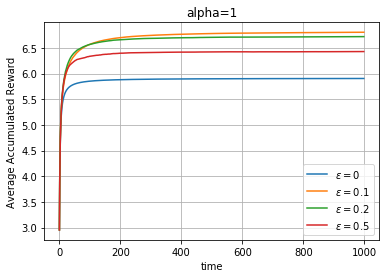

In [465]:
# Part a -    

import numpy as np
import matplotlib.pyplot as plt
import random

Qs1=5
Qs2=7
a1=[0]*1000
a2=[0]*1000
a3=[0]*1000
a4=[0]*1000

ep1=0
ep2=0.1
ep3=0.2
ep4=0.5

def eps(x,y,y1,q1,q2):
    if y>=x:
        if q1==q2:
            if y1>=0.5:
                return 1
            elif y1<0.5:
                return 0     
        elif q1!=q2 and max(q1,q2)==q2:
            return 1
        elif q1!=q2  and max(q1,q2)==q1:
            return 0
    else:
        if y1>=0.5:
            return 1
        elif y1<0.5:
            return 0  
    
    
for j in range(99):
    Q11=[]
    Q12=[]
    Q21=[]
    Q22=[]
    Q31=[]
    Q32=[]
    Q41=[]
    Q42=[]
    
    r1=[]
    r2=[]
    r3=[]
    r4=[]
    
    acr1=[]
    acr2=[]
    acr3=[]
    acr4=[]
    
    q11=0
    q12=0
    q21=0
    q22=0
    q31=0
    q32=0
    q41=0
    q42=0
    
    alpha=1
    
    Q11.append(q11)
    Q12.append(q12)
    Q21.append(q21)
    Q22.append(q22)
    Q31.append(q31)
    Q32.append(q32)
    Q41.append(q41)
    Q42.append(q42)
    
    for i in range(999):
        y=random.uniform(0,1)
        y1=random.uniform(0,1)
        if eps(ep1,y,y1,q11,q12)==0:
            Q11.append(q11+alpha*(Qs1-q11))
            Q12.append(q12)
            q11=q11+alpha*(Qs1-q11)
            r1.append(Qs1)
        elif eps(ep1,y,y1,q11,q12)==1:
            Q12.append(q12+alpha*(Qs2-q12))
            Q11.append(q11)
            q12=q12+alpha*(Qs2-q12)
            r1.append(Qs2)
        acr1.append((1/(i+2))*np.sum(r1))
        
        if eps(ep2,y,y1,q21,q22)==0:
            Q21.append(q21+alpha*(Qs1-q21))
            Q22.append(q22)
            q21=q21+alpha*(Qs1-q21)
            r2.append(Qs1)
        elif eps(ep2,y,y1,q21,q22)==1:
            Q22.append(q22+alpha*(Qs2-q22))
            Q21.append(q21)
            q22=q22+alpha*(Qs2-q22)
            r2.append(Qs2)
        acr2.append((1/(i+2))*np.sum(r2)) 
        
        if eps(ep3,y,y1,q31,q32)==0:
            Q31.append(q31+alpha*(Qs1-q31))
            Q32.append(q32)
            q31=q31+alpha*(Qs1-q31)
            r3.append(Qs1)
        elif eps(ep3,y,y1,q31,q32)==1:
            Q32.append(q32+alpha*(Qs2-q32))
            Q31.append(q31)
            q32=q32+alpha*(Qs2-q32)
            r3.append(Qs2)
        acr3.append((1/(i+2))*np.sum(r3))
        
        if eps(ep4,y,y1,q41,q42)==0:
            Q41.append(q41+alpha*(Qs1-q41))
            Q42.append(q42)
            q41=q41+alpha*(Qs1-q41)
            r4.append(Qs1)
        elif eps(ep4,y,y1,q41,q42)==1:
            Q42.append(q42+alpha*(Qs2-q42))
            Q41.append(q41)
            q42=q42+alpha*(Qs2-q42)
            r4.append(Qs2)
        acr4.append((1/(i+2))*np.sum(r4)) 
        
    zipl = zip(a1, acr1)
    zip2 = zip(a2, acr2)
    zip3 = zip(a3, acr3)
    zip4 = zip(a4, acr4)
    
    a1 = [(a + 0.01*b) for (a, b) in zipl]
    a2 = [(a + 0.01*b) for (a, b) in zip2]
    a3 = [(a + 0.01*b) for (a, b) in zip3]
    a4 = [(a + 0.01*b) for (a, b) in zip4]

plt.plot(a1,label = "$\epsilon=0$")
plt.plot(a2,label = "$\epsilon=0.1$")
plt.plot(a3,label = "$\epsilon=0.2$")
plt.plot(a4,label = "$\epsilon=0.5$")
plt.legend()
plt.grid()
plt.xlabel('time') 
plt.ylabel('Average Accumulated Reward') 
plt.title("alpha=1")
plt.savefig('parta_alpha1.pdf')
plt.show()

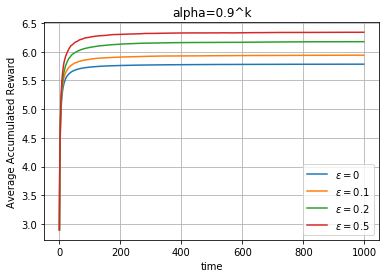

In [484]:
##Part a --- Epsilon Greedy, alpha=0.9^k


import numpy as np
import matplotlib.pyplot as plt
import random

Qs1=5
Qs2=7
a1=[0]*1000
a2=[0]*1000
a3=[0]*1000
a4=[0]*1000

ep1=0
ep2=0.1
ep3=0.2
ep4=0.5

def eps(x,y,y1,q1,q2):
    if y>=x:
        if q1==q2:
            
            if y1>=0.5:
                return 1
            elif y1<0.5:
                return 0     
        elif q1!=q2 and max(q1,q2)==q2:
            return 1
        elif q1!=q2  and max(q1,q2)==q1:
            return 0
    else:
        if y1>=0.5:
            return 1
        elif y1<0.5:
            return 0  
    
    
for j in range(99):
    Q11=[]
    Q12=[]
    Q21=[]
    Q22=[]
    Q31=[]
    Q32=[]
    Q41=[]
    Q42=[]
    
    r1=[]
    r2=[]
    r3=[]
    r4=[]
    
    acr1=[]
    acr2=[]
    acr3=[]
    acr4=[]
    
    q11=0
    q12=0
    q21=0
    q22=0
    q31=0
    q32=0
    q41=0
    q42=0
    
    Q11.append(q11)
    Q12.append(q12)
    Q21.append(q21)
    Q22.append(q22)
    Q31.append(q31)
    Q32.append(q32)
    Q41.append(q41)
    Q42.append(q42)
    
    for i in range(999):
        alpha=math.pow(0.9,i+1)
        y=random.uniform(0,1)
        y1=random.uniform(0,1)
        if eps(ep1,y,y1,q11,q12)==0:
            Q11.append(q11+alpha*(Qs1-q11))
            Q12.append(q12)
            q11=q11+alpha*(Qs1-q11)
            r1.append(Qs1)
        elif eps(ep1,y,y1,q11,q12)==1:
            Q12.append(q12+alpha*(Qs2-q12))
            Q11.append(q11)
            q12=q12+alpha*(Qs2-q12)
            r1.append(Qs2)
        acr1.append((1/(i+2))*np.sum(r1))
        
        if eps(ep2,y,y1,q21,q22)==0:
            Q21.append(q21+alpha*(Qs1-q21))
            Q22.append(q22)
            q21=q21+alpha*(Qs1-q21)
            r2.append(Qs1)
        elif eps(ep2,y,y1,q21,q22)==1:
            Q22.append(q22+alpha*(Qs2-q22))
            Q21.append(q21)
            q22=q22+alpha*(Qs2-q22)
            r2.append(Qs2)
        acr2.append((1/(i+2))*np.sum(r2)) 
        
        if eps(ep3,y,y1,q31,q32)==0:
            Q31.append(q31+alpha*(Qs1-q31))
            Q32.append(q32)
            q31=q31+alpha*(Qs1-q31)
            r3.append(Qs1)
        elif eps(ep3,y,y1,q31,q32)==1:
            Q32.append(q32+alpha*(Qs2-q32))
            Q31.append(q31)
            q32=q32+alpha*(Qs2-q32)
            r3.append(Qs2)
        acr3.append((1/(i+2))*np.sum(r3))
        
        if eps(ep4,y,y1,q41,q42)==0:
            Q41.append(q41+alpha*(Qs1-q41))
            Q42.append(q42)
            q41=q41+alpha*(Qs1-q41)
            r4.append(Qs1)
        elif eps(ep4,y,y1,q41,q42)==1:
            Q42.append(q42+alpha*(Qs2-q42))
            Q41.append(q41)
            q42=q42+alpha*(Qs2-q42)
            r4.append(Qs2)
        acr4.append((1/(i+2))*np.sum(r4)) 
        
    zipl = zip(a1, acr1)
    zip2 = zip(a2, acr2)
    zip3 = zip(a3, acr3)
    zip4 = zip(a4, acr4)
    
    a1 = [(a + 0.01*b) for (a, b) in zipl]
    a2 = [(a + 0.01*b) for (a, b) in zip2]
    a3 = [(a + 0.01*b) for (a, b) in zip3]
    a4 = [(a + 0.01*b) for (a, b) in zip4]

plt.plot(a1,label = "$\epsilon=0$")
plt.plot(a2,label = "$\epsilon=0.1$")
plt.plot(a3,label = "$\epsilon=0.2$")
plt.plot(a4,label = "$\epsilon=0.5$")
plt.legend()
plt.grid()
plt.xlabel('time') 
plt.ylabel('Average Accumulated Reward') 
plt.title("alpha=0.9^k")
plt.savefig('parta_alpha9k.pdf')
plt.show()


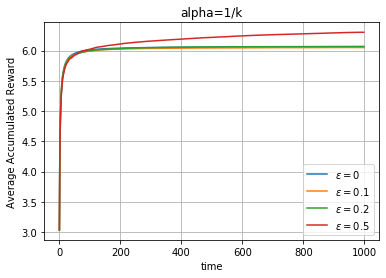

In [530]:
##Part a --- Epsilon Greedy, alpha=1/k


import numpy as np
import matplotlib.pyplot as plt
import random

Qs1=5
Qs2=7
a1=[0]*1000
a2=[0]*1000
a3=[0]*1000
a4=[0]*1000

ep1=0
ep2=0.1
ep3=0.2
ep4=0.5

def eps(x,y,y1,q1,q2):
    if y>=x:
        if q1==q2:
            
            if y1>=0.5:
                return 1
            elif y1<0.5:
                return 0     
        elif q1!=q2 and max(q1,q2)==q2:
            return 1
        elif q1!=q2  and max(q1,q2)==q1:
            return 0
    else:
        if y1>=0.5:
            return 1
        elif y1<0.5:
            return 0  
    
    
for j in range(99):
    Q11=[]
    Q12=[]
    Q21=[]
    Q22=[]
    Q31=[]
    Q32=[]
    Q41=[]
    Q42=[]
    
    r1=[]
    r2=[]
    r3=[]
    r4=[]
    
    acr1=[]
    acr2=[]
    acr3=[]
    acr4=[]
    
    q11=0
    q12=0
    q21=0
    q22=0
    q31=0
    q32=0
    q41=0
    q42=0
    
    Q11.append(q11)
    Q12.append(q12)
    Q21.append(q21)
    Q22.append(q22)
    Q31.append(q31)
    Q32.append(q32)
    Q41.append(q41)
    Q42.append(q42)
    
    for i in range(999):
        alpha=1/(1+i)
        y=random.uniform(0,1)
        y1=random.uniform(0,1)
        if eps(ep1,y,y1,q11,q12)==0:
            Q11.append(q11+alpha*(Qs1-q11))
            Q12.append(q12)
            q11=q11+alpha*(Qs1-q11)
            r1.append(Qs1)
        elif eps(ep1,y,y1,q11,q12)==1:
            Q12.append(q12+alpha*(Qs2-q12))
            Q11.append(q11)
            q12=q12+alpha*(Qs2-q12)
            r1.append(Qs2)
        acr1.append((1/(i+2))*np.sum(r1))
        
        if eps(ep2,y,y1,q21,q22)==0:
            Q21.append(q21+alpha*(Qs1-q21))
            Q22.append(q22)
            q21=q21+alpha*(Qs1-q21)
            r2.append(Qs1)
        elif eps(ep2,y,y1,q21,q22)==1:
            Q22.append(q22+alpha*(Qs2-q22))
            Q21.append(q21)
            q22=q22+alpha*(Qs2-q22)
            r2.append(Qs2)
        acr2.append((1/(i+2))*np.sum(r2)) 
        
        if eps(ep3,y,y1,q31,q32)==0:
            Q31.append(q31+alpha*(Qs1-q31))
            Q32.append(q32)
            q31=q31+alpha*(Qs1-q31)
            r3.append(Qs1)
        elif eps(ep3,y,y1,q31,q32)==1:
            Q32.append(q32+alpha*(Qs2-q32))
            Q31.append(q31)
            q32=q32+alpha*(Qs2-q32)
            r3.append(Qs2)
        acr3.append((1/(i+2))*np.sum(r3))
        
        if eps(ep4,y,y1,q41,q42)==0:
            Q41.append(q41+alpha*(Qs1-q41))
            Q42.append(q42)
            q41=q41+alpha*(Qs1-q41)
            r4.append(Qs1)
        elif eps(ep4,y,y1,q41,q42)==1:
            Q42.append(q42+alpha*(Qs2-q42))
            Q41.append(q41)
            q42=q42+alpha*(Qs2-q42)
            r4.append(Qs2)
        acr4.append((1/(i+2))*np.sum(r4)) 
        
    zipl = zip(a1, acr1)
    zip2 = zip(a2, acr2)
    zip3 = zip(a3, acr3)
    zip4 = zip(a4, acr4)
    
    a1 = [(a + 0.01*b) for (a, b) in zipl]
    a2 = [(a + 0.01*b) for (a, b) in zip2]
    a3 = [(a + 0.01*b) for (a, b) in zip3]
    a4 = [(a + 0.01*b) for (a, b) in zip4]

plt.plot(a1,label = "$\epsilon=0$")
plt.plot(a2,label = "$\epsilon=0.1$")
plt.plot(a3,label = "$\epsilon=0.2$")
plt.plot(a4,label = "$\epsilon=0.5$")
plt.legend()
plt.grid()
plt.xlabel('time') 
plt.ylabel('Average Accumulated Reward') 
plt.title("alpha=1/k")
plt.savefig('parta_alpha1overk.pdf')
plt.show()


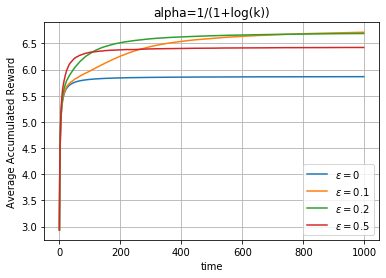

In [508]:
## Part a --- Epsilon Greedy, alpha=1/(1+ln(1+k))


import numpy as np
import matplotlib.pyplot as plt
import random

Qs1=5
Qs2=7
a1=[0]*1000
a2=[0]*1000
a3=[0]*1000
a4=[0]*1000

ep1=0
ep2=0.1
ep3=0.2
ep4=0.5

def eps(x,y,y1,q1,q2):
    if y>=x:
        if q1==q2:
            
            if y1>=0.5:
                return 1
            elif y1<0.5:
                return 0     
        elif q1!=q2 and max(q1,q2)==q2:
            return 1
        elif q1!=q2  and max(q1,q2)==q1:
            return 0
    else:
        if y1>=0.5:
            return 1
        elif y1<0.5:
            return 0  
    
    
for j in range(99):
    Q11=[]
    Q12=[]
    Q21=[]
    Q22=[]
    Q31=[]
    Q32=[]
    Q41=[]
    Q42=[]
    
    r1=[]
    r2=[]
    r3=[]
    r4=[]
    
    acr1=[]
    acr2=[]
    acr3=[]
    acr4=[]
    
    q11=0
    q12=0
    q21=0
    q22=0
    q31=0
    q32=0
    q41=0
    q42=0
    
    Q11.append(q11)
    Q12.append(q12)
    Q21.append(q21)
    Q22.append(q22)
    Q31.append(q31)
    Q32.append(q32)
    Q41.append(q41)
    Q42.append(q42)
    
    for i in range(999):
        alpha=1/(1+math.log(2+i))
        y=random.uniform(0,1)
        y1=random.uniform(0,1)
        if eps(ep1,y,y1,q11,q12)==0:
            Q11.append(q11+alpha*(Qs1-q11))
            Q12.append(q12)
            q11=q11+alpha*(Qs1-q11)
            r1.append(Qs1)
        elif eps(ep1,y,y1,q11,q12)==1:
            Q12.append(q12+alpha*(Qs2-q12))
            Q11.append(q11)
            q12=q12+alpha*(Qs2-q12)
            r1.append(Qs2)
        acr1.append((1/(i+2))*np.sum(r1))
        
        if eps(ep2,y,y1,q21,q22)==0:
            Q21.append(q21+alpha*(Qs1-q21))
            Q22.append(q22)
            q21=q21+alpha*(Qs1-q21)
            r2.append(Qs1)
        elif eps(ep2,y,y1,q21,q22)==1:
            Q22.append(q22+alpha*(Qs2-q22))
            Q21.append(q21)
            q22=q22+alpha*(Qs2-q22)
            r2.append(Qs2)
        acr2.append((1/(i+2))*np.sum(r2)) 
        
        if eps(ep3,y,y1,q31,q32)==0:
            Q31.append(q31+alpha*(Qs1-q31))
            Q32.append(q32)
            q31=q31+alpha*(Qs1-q31)
            r3.append(Qs1)
        elif eps(ep3,y,y1,q31,q32)==1:
            Q32.append(q32+alpha*(Qs2-q32))
            Q31.append(q31)
            q32=q32+alpha*(Qs2-q32)
            r3.append(Qs2)
        acr3.append((1/(i+2))*np.sum(r3))
        
        if eps(ep4,y,y1,q41,q42)==0:
            Q41.append(q41+alpha*(Qs1-q41))
            Q42.append(q42)
            q41=q41+alpha*(Qs1-q41)
            r4.append(Qs1)
        elif eps(ep4,y,y1,q41,q42)==1:
            Q42.append(q42+alpha*(Qs2-q42))
            Q41.append(q41)
            q42=q42+alpha*(Qs2-q42)
            r4.append(Qs2)
        acr4.append((1/(i+2))*np.sum(r4)) 
        
    zipl = zip(a1, acr1)
    zip2 = zip(a2, acr2)
    zip3 = zip(a3, acr3)
    zip4 = zip(a4, acr4)
    
    a1 = [(a + 0.01*b) for (a, b) in zipl]
    a2 = [(a + 0.01*b) for (a, b) in zip2]
    a3 = [(a + 0.01*b) for (a, b) in zip3]
    a4 = [(a + 0.01*b) for (a, b) in zip4]

plt.plot(a1,label = "$\epsilon=0$")
plt.plot(a2,label = "$\epsilon=0.1$")
plt.plot(a3,label = "$\epsilon=0.2$")
plt.plot(a4,label = "$\epsilon=0.5$")
plt.legend()
plt.grid()
plt.xlabel('time') 
plt.ylabel('Average Accumulated Reward') 
plt.title("alpha=1/(1+log(k))")
plt.savefig('parta_alphalnk.pdf')
plt.show()



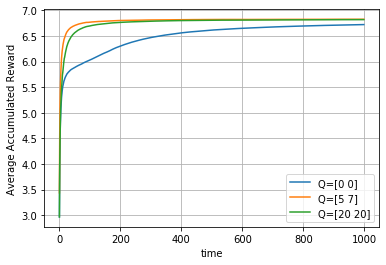

In [518]:
##Part b --- alpha=0.1, eps=0.1


import numpy as np
import matplotlib.pyplot as plt
import random

Qs1=5
Qs2=7
a1=[0]*1000
a2=[0]*1000
a3=[0]*1000

ep1=0.1
ep2=0.1
ep3=0.1

def eps(x,y,y1,q1,q2):
    if y>=x:
        if q1==q2:
            
            if y1>=0.5:
                return 1
            elif y1<0.5:
                return 0     
        elif q1!=q2 and max(q1,q2)==q2:
            return 1
        elif q1!=q2  and max(q1,q2)==q1:
            return 0
    else:
        if y1>=0.5:
            return 1
        elif y1<0.5:
            return 0  
    
    
for j in range(99):
    Q11=[]
    Q12=[]
    Q21=[]
    Q22=[]
    Q31=[]
    Q32=[]
    
    r1=[]
    r2=[]
    r3=[]
    
    acr1=[]
    acr2=[]
    acr3=[]
    
    q11=0
    q12=0
    q21=5
    q22=7
    q31=20
    q32=20
    
    alpha=0.1
    
    Q11.append(q11)
    Q12.append(q12)
    Q21.append(q21)
    Q22.append(q22)
    Q31.append(q31)
    Q32.append(q32)
    
    for i in range(999):
        alpha=1/(1+math.log(2+i))
        y=random.uniform(0,1)
        y1=random.uniform(0,1)
        if eps(ep1,y,y1,q11,q12)==0:
            Q11.append(q11+alpha*(Qs1-q11))
            Q12.append(q12)
            q11=q11+alpha*(Qs1-q11)
            r1.append(Qs1)
        elif eps(ep1,y,y1,q11,q12)==1:
            Q12.append(q12+alpha*(Qs2-q12))
            Q11.append(q11)
            q12=q12+alpha*(Qs2-q12)
            r1.append(Qs2)
        acr1.append((1/(i+2))*np.sum(r1))
        
        if eps(ep2,y,y1,q21,q22)==0:
            Q21.append(q21+alpha*(Qs1-q21))
            Q22.append(q22)
            q21=q21+alpha*(Qs1-q21)
            r2.append(Qs1)
        elif eps(ep2,y,y1,q21,q22)==1:
            Q22.append(q22+alpha*(Qs2-q22))
            Q21.append(q21)
            q22=q22+alpha*(Qs2-q22)
            r2.append(Qs2)
        acr2.append((1/(i+2))*np.sum(r2)) 
        
        if eps(ep3,y,y1,q31,q32)==0:
            Q31.append(q31+alpha*(Qs1-q31))
            Q32.append(q32)
            q31=q31+alpha*(Qs1-q31)
            r3.append(Qs1)
        elif eps(ep3,y,y1,q31,q32)==1:
            Q32.append(q32+alpha*(Qs2-q32))
            Q31.append(q31)
            q32=q32+alpha*(Qs2-q32)
            r3.append(Qs2)
        acr3.append((1/(i+2))*np.sum(r3))
        
    zipl = zip(a1, acr1)
    zip2 = zip(a2, acr2)
    zip3 = zip(a3, acr3)
    
    a1 = [(a + 0.01*b) for (a, b) in zipl]
    a2 = [(a + 0.01*b) for (a, b) in zip2]
    a3 = [(a + 0.01*b) for (a, b) in zip3]

plt.plot(a1,label = "Q=[0 0]")
plt.plot(a2,label = "Q=[5 7]")
plt.plot(a3,label = "Q=[20 20]")
plt.legend()
plt.grid()
plt.xlabel('time') 
plt.ylabel('Average Accumulated Reward') 
plt.savefig('partb.pdf')
plt.show()



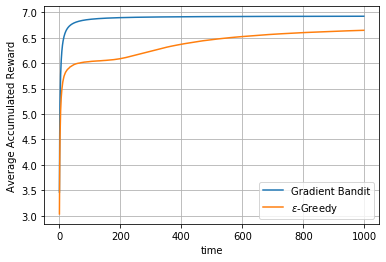

In [464]:
##Part c --- Gradient Bandit


import numpy as np
import matplotlib.pyplot as plt
import random
import math
from math import e

Qs1=5
Qs2=7
a1=[0]*1000
a2=[0]*1000
ep2=0.1
alpha=0.1

def eps(x,y,y1,q1,q2):
    if y>=x:
        if q1==q2:
            
            if y1>=0.5:
                return 1
            elif y1<0.5:
                return 0     
        elif q1!=q2 and max(q1,q2)==q2:
            return 1
        elif q1!=q2  and max(q1,q2)==q1:
            return 0
    else:
        if y1>=0.5:
            return 1
        elif y1<0.5:
            return 0    
    
def pifunction(h1,h2):
    pi1=math.pow(e,h1)/(math.pow(e,h1)+math.pow(e,h2))
    pi2=1-pi1
    if pi2>=pi1:
        return [0,pi2]
    elif pi2<pi1:
        return [1,pi1]
    
    
for j in range(99):
    
    H11=[]
    H12=[]
    Q21=[]
    Q22=[]
    
    r1=[]
    r2=[]
    
    acr1=[]
    acr2=[]
    
    h11=0
    h12=0
    q21=0
    q22=0

    
    H11.append(h11)
    H12.append(h12)
    Q21.append(q21)
    Q22.append(q22)

    
    for i in range(999):
        y=random.uniform(0,1)
        y1=random.uniform(0,1)
        if pifunction(h1,h2)[0]==1:
            r1.append(Qs1)
            ave_r1=(1/(i+2))*np.sum(r1)
            H11.append(h11+alpha*(Qs1-ave_r1)*(1-pifunction(h1,h2)[1]))
            H12.append(h12-alpha*(Qs1-ave_r1)*pifunction(h1,h2)[1])
            h11=h11+alpha*(Qs1-ave_r1)*(1-pifunction(h1,h2)[1])
            h12=h12-alpha*(Qs1-ave_r1)*pifunction(h1,h2)[1]
        elif pifunction(h1,h2)[0]==0:
            r1.append(Qs2)
            ave_r1=(1/(i+2))*np.sum(r1)
            H12.append(h12+alpha*(Qs2-ave_r1)*(1-pifunction(h1,h2)[1]))
            H11.append(h11-alpha*(Qs2-ave_r1)*pifunction(h1,h2)[1])
            h12=h12+alpha*(Qs2-ave_r1)*(1-pifunction(h1,h2)[1])
            h11=h11-alpha*(Qs2-ave_r1)*pifunction(h1,h2)[1]
        acr1.append((1/(i+2))*np.sum(r1))
        
        if eps(ep2,y,y1,q21,q22)==0:
            Q21.append(q21+alpha*(Qs1-q21))
            Q22.append(q22)
            q21=q21+alpha*(Qs1-q21)
            r2.append(Qs1)
        elif eps(ep2,y,y1,q21,q22)==1:
            Q22.append(q22+alpha*(Qs2-q22))
            Q21.append(q21)
            q22=q22+alpha*(Qs2-q22)
            r2.append(Qs2)
        acr2.append((1/(i+2))*np.sum(r2)) 
        
    zipl = zip(a1, acr1)
    zip2 = zip(a2, acr2)
    
    a1 = [(a + 0.01*b) for (a, b) in zipl]
    a2 = [(a + 0.01*b) for (a, b) in zip2]

plt.plot(a1,label = "Gradient Bandit")
plt.plot(a2,label = "$\epsilon$-Greedy ")
plt.legend()
plt.grid()
plt.xlabel('time') 
plt.ylabel('Average Accumulated Reward')
plt.savefig('partc.pdf')
plt.show()
